# Example of an analysis 

First read some libraries needed. 


In [3]:
import numpy as np
import scipy as sp
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

## Some functions
The same as defined in previous the 2D linear case 

In [17]:

def plot_flow(ax,rhs,xrange=[-2,2],yrange=[-2,2],xnum=100,ynum=100,params=None,nullclines=False):
    # Set up u,v space
    u = np.linspace(xrange[0], xrange[1], xnum)
    v = np.linspace(yrange[0], yrange[1], ynum)
    uu, vv = np.meshgrid(u, v)

# Compute derivatives
    u_vel = np.empty_like(uu)
    v_vel = np.empty_like(vv)
    for i in range(uu.shape[0]):
        for j in range(uu.shape[1]):
            u_vel[i,j], v_vel[i,j] = rhs(0, np.array([uu[i,j], vv[i,j]]))

# Compute speed
    speed = np.sqrt(u_vel**2 + v_vel**2)

    # Make linewidths proportional to speed,
    # with minimal line width of 0.5 and max of 3
    lw = 0.5 + 2.5 * speed / speed.max()

# Make stream plot
    ax.streamplot(uu, vv, u_vel, v_vel, linewidth=lw,color='grey')
#Nullclines
    if nullclines: 
        ax.contour(uu, vv, u_vel, [0],colors=('r'))
        ax.contour(uu, vv, v_vel, [0],colors=('b'))

    return ax

# A function that plots a path 
def plot_solution(ax,rhs,y0,t_end,t_dim=2000,params=None,color='green',init_pt=True,linewidth=2.5):

    t = np.linspace(0, t_end, t_dim)
    X = sp.integrate.solve_ivp(rhs,t_span=[t[0],t[-1]],y0=y0,t_eval=t,args=(params,))
    x,y=X.y
    t=X.t
    ax.plot(x,y, color=color,linewidth=linewidth)
    if (init_pt):
        ax=plot_point(ax,y0,color=color)
    return ax

#A function to add fixed points to a phase diagram 
def plot_point(ax, coord, color='black',markersize=20):
    """Add fixed points to plot."""
    x,y=coord
    ax.plot(x,y, '.', color='black', markerfacecolor=color, markersize=markersize)
    return ax



# Let's start with the last challenge from the linear phase plane file.

The system of differential equations defined by the `rhs` function is:

$$
\begin{align}
\dot{x} &= y(1 - x^2) \\
\dot{y} &= -x(1 - y^2)
\end{align}
$$

So 
$$
{\bf F}(\bf x)=
\left[ 
\begin{matrix} 
 y(1 - x^2) \\
 -x(1 - y^2)
\end{matrix}
\right]
$$

with equilibrium points at 

$$
(x,y)=(0, 0),\quad (x,y)=(1, 1),\quad (x,y)=(-1, -1),\quad (x,y)=(1, -1),\quad (x,y)=(-1, 1).
$$

The Jacobian will be 
$$
 J= \left[
    \begin{matrix}
        -2xy & 1-x^2 \\
        -(1-y^2) & 2xy
    \end{matrix}
    \right]
$$

Further analysis shows that origin is a center, while the other four are saddle points. 

In [ ]:
# Defines the right-hand side of the nonlinear system
def rhs(t,xy):
    x,y=xy
    dx= y*(1-x**2)
    dy=-x*(1-y**2)
    return [dx,dy]

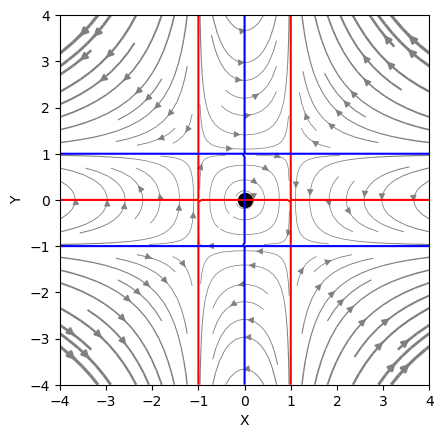

In [38]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

# Plot the fixed points
plot_point(ax, [0,0])

# Plot the flow, change the nulclines to True to plot the nullclines
plot_flow(ax, rhs, xrange=[-4, 4], yrange=[-4, 4], xnum=100, ynum=100, nullclines=True);


# Exercises
1. Analyse the linear system when 
$$
A= \left(
    \begin{array}{cc}
    a & 0 \\
    0 & -1
    \end{array} 
\right)
$$
and $a$ varies from $- \infty$ to $\infty$.

2. Analyse the linear system when 
$$
A= \left(
    \begin{array}{cc}
    0 & 1 \\
    1 & 0
    \end{array} 
\right)
$$
3. Analyse the linear system when 
$$
A= \left(
    \begin{array}{cc}
    0 & 1 \\
    -1 & 0
    \end{array} 
\right)
$$
4. Analyse the linear system when 
$$
A= \left(
    \begin{array}{cc}
    2 & 1 \\
    3 & 4
    \end{array} 
\right)
$$
5. Analyse the linear system when 
$$
A= \left(
    \begin{array}{cc}
    -1 & 0 \\
    0 & -2
    \end{array} 
\right)
$$
6. Analyse the linear system when 
$$
A= \left(
    \begin{array}{cc}
    -1 & -2 \\
    2 & -2
    \end{array} 
\right)
$$